In [1]:
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv('../processed.cleveland.data')

7. Attribute Information:
   -- Only 14 used
      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num)       (the predicted attribute)


In [36]:
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

categorical_features = df.nunique().to_dict()

categorical_features


{'age': 41,
 'sex': 2,
 'cp': 4,
 'trestbps': 50,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalach': 91,
 'exang': 2,
 'oldpeak': 40,
 'slope': 3,
 'ca': 5,
 'thal': 4,
 'num': 5}

In [15]:
# There were few datapoints wiht ? value, we simply dropped them.

df = df.apply(pd.to_numeric, errors='coerce').dropna()


In [16]:
# Finding number of not null values -> we can see that none of the values are null so we are fine.

df.isna().count()

age         296
sex         296
cp          296
trestbps    296
chol        296
fbs         296
restecg     296
thalach     296
exang       296
oldpeak     296
slope       296
ca          296
thal        296
num         296
dtype: int64

In [17]:
# Finding basic statistical data such as mean median mode etc.

# In report talk about data with high std

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,54.513514,0.675676,3.165541,131.648649,247.398649,0.141892,0.993243,149.597973,0.327703,1.051351,1.597973,0.679054,4.726351,0.949324
std,9.051631,0.468915,0.958262,17.775956,52.078915,0.349530,0.994879,22.980401,0.470171,1.165841,0.613848,0.939726,1.940500,1.235410
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.250000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


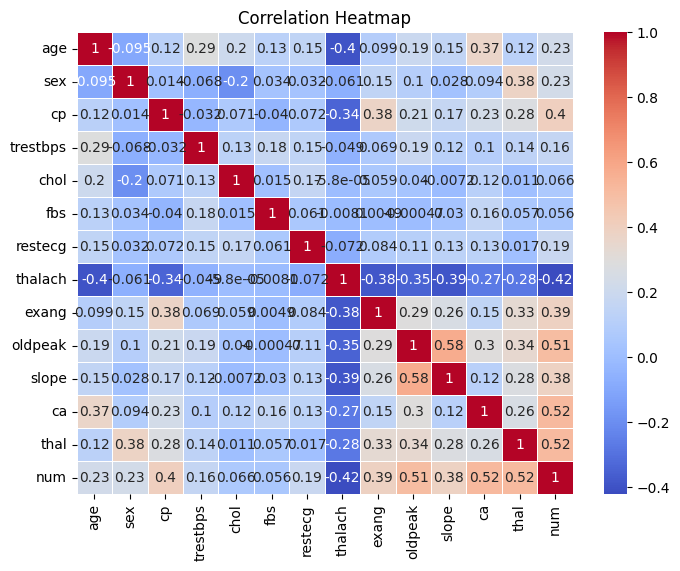

In [18]:
# talk about high correlation etc for this part.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(8, 6))  # Set the size of the heatmap

sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=.5)

plt.title("Correlation Heatmap")  # Add a title
plt.show()


/home/priyash7/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


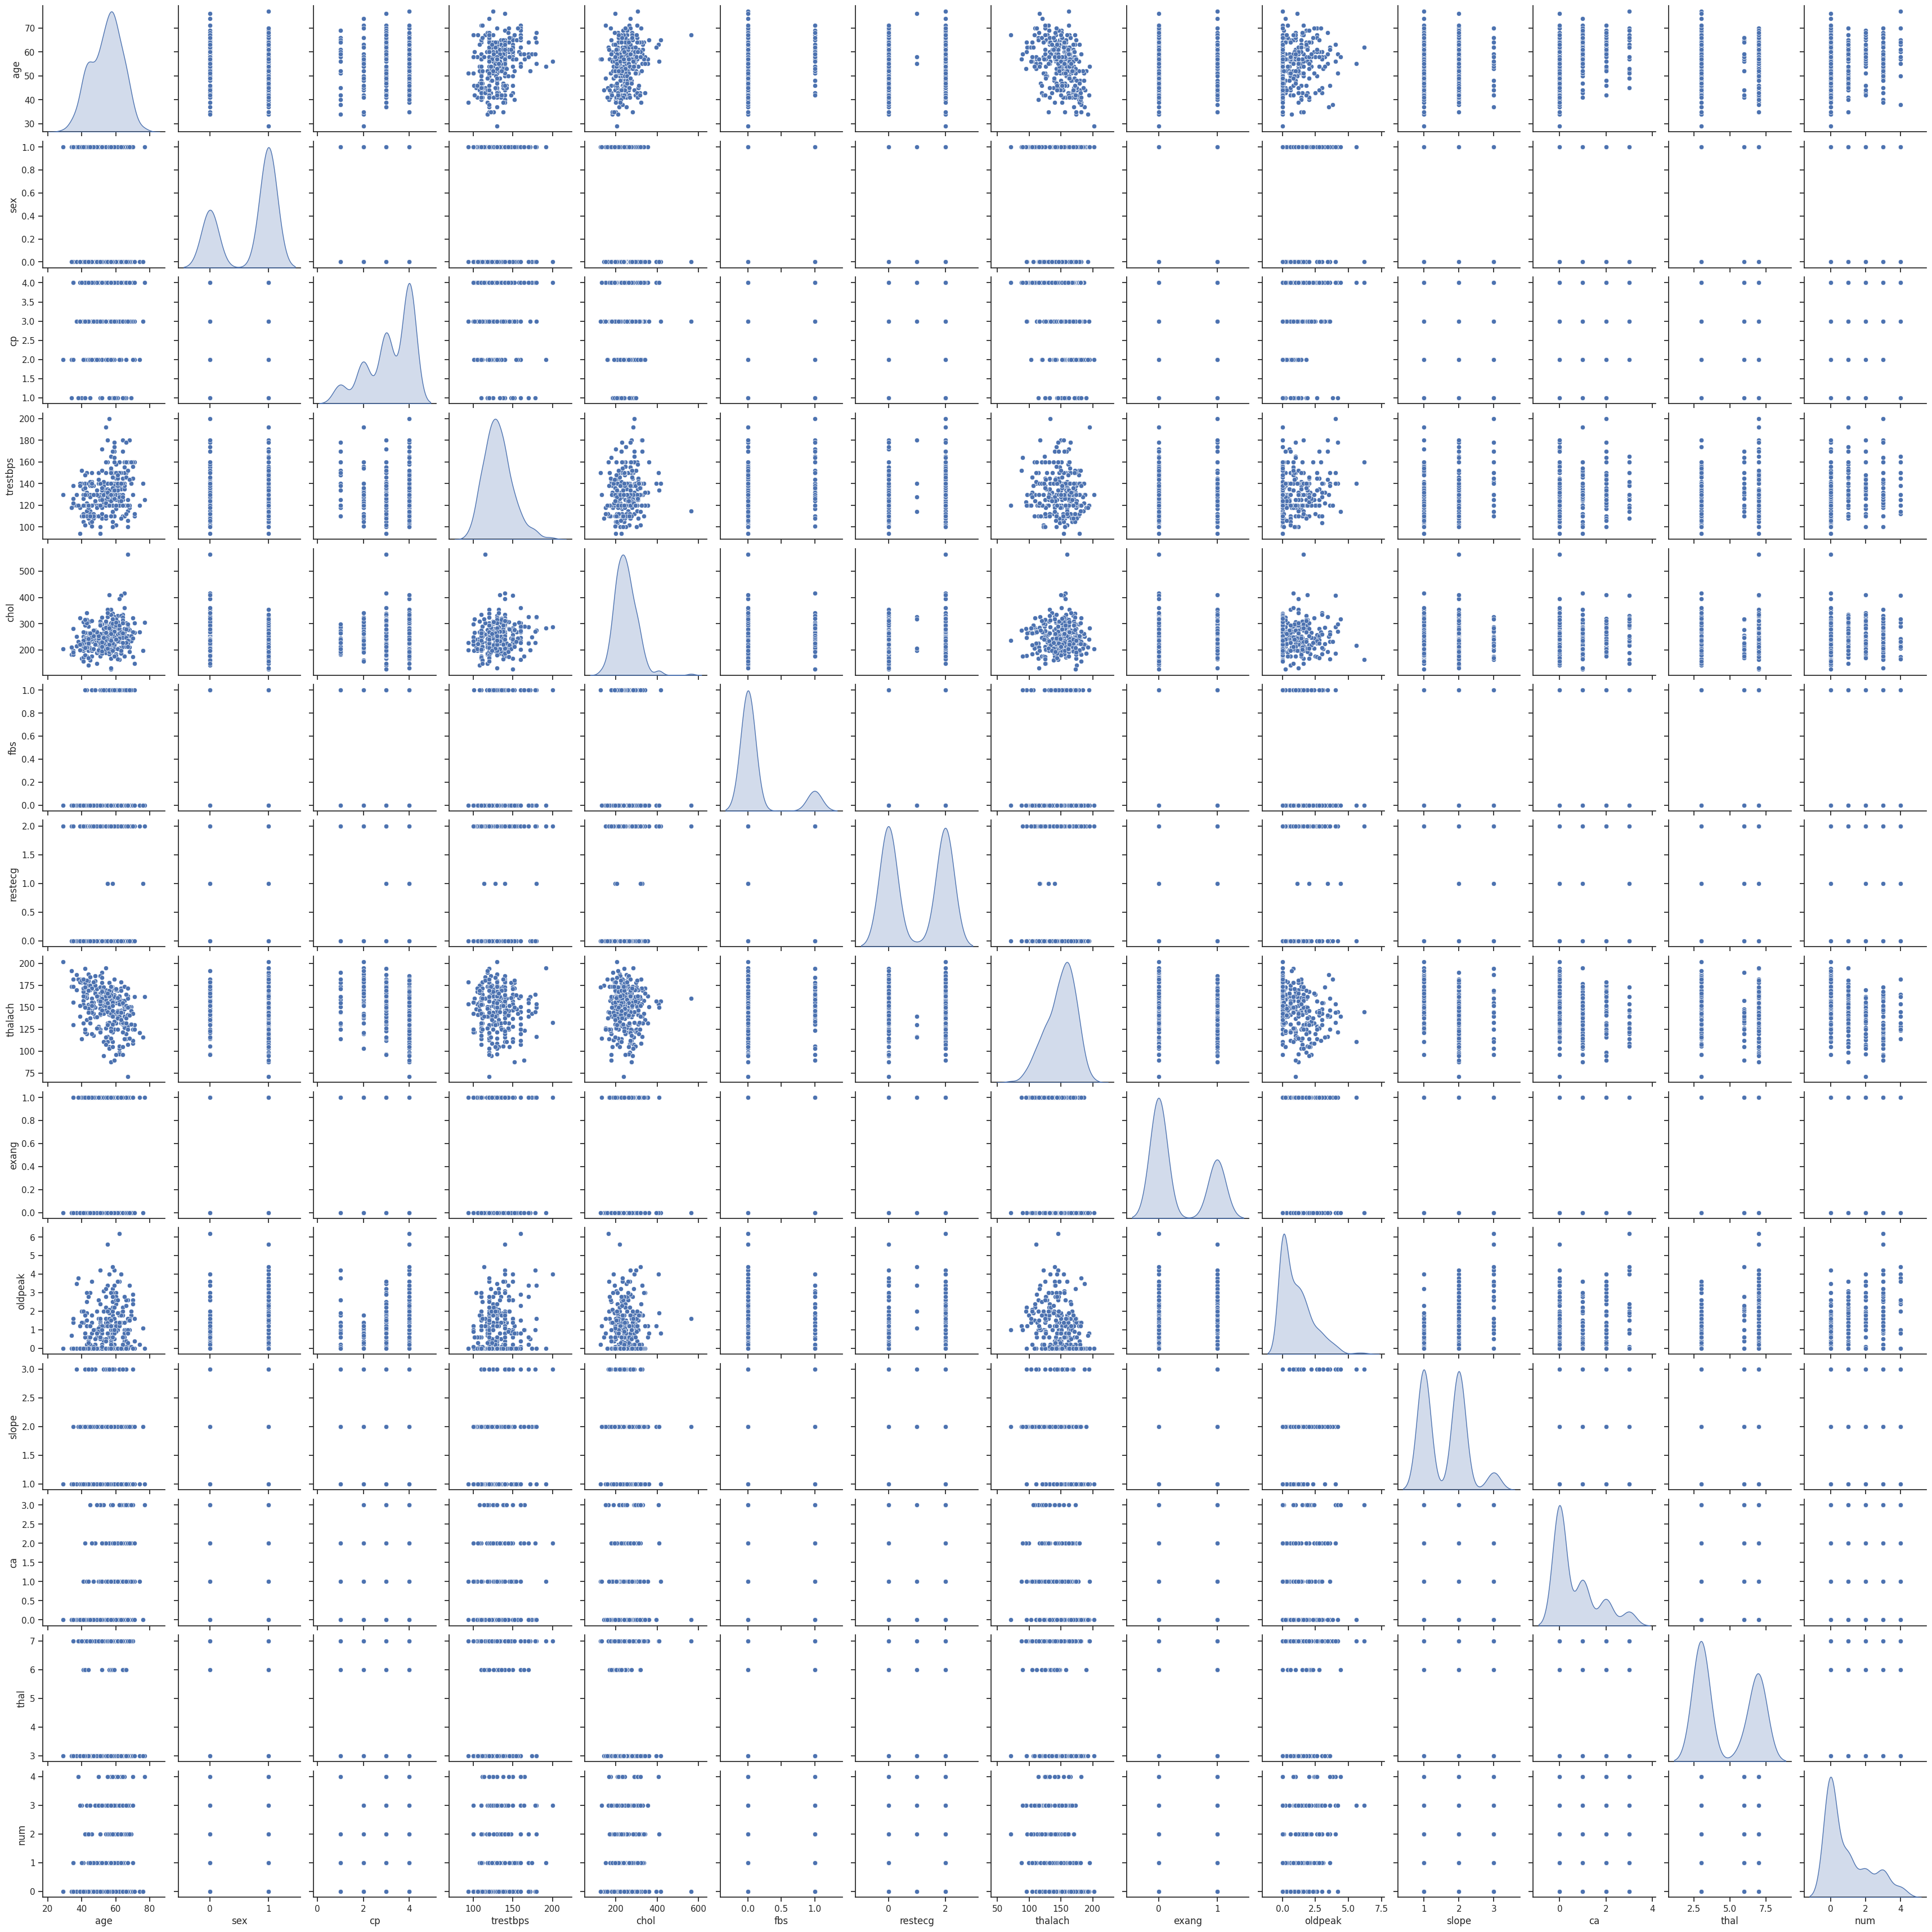

In [20]:
sns.set(style="ticks")
sns.pairplot(df, diag_kind="kde")  # diag_kind can be "hist" or "kde" for diagonal plots

plt.show()

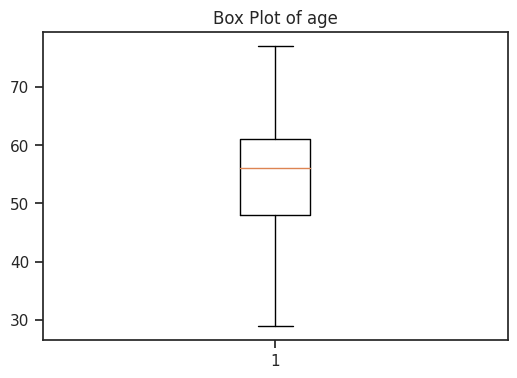

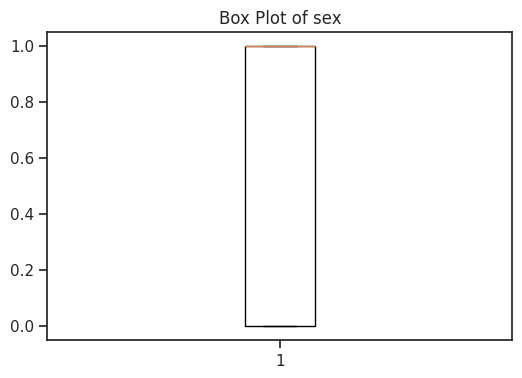

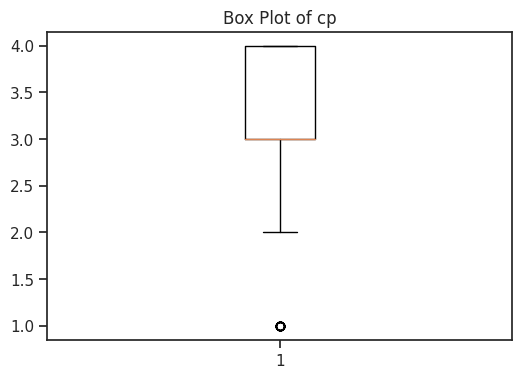

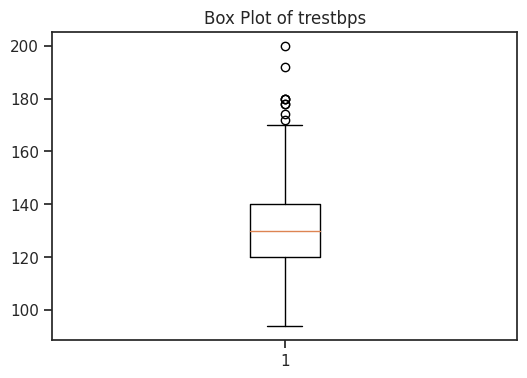

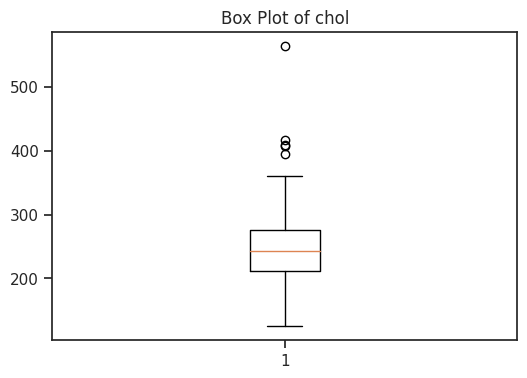

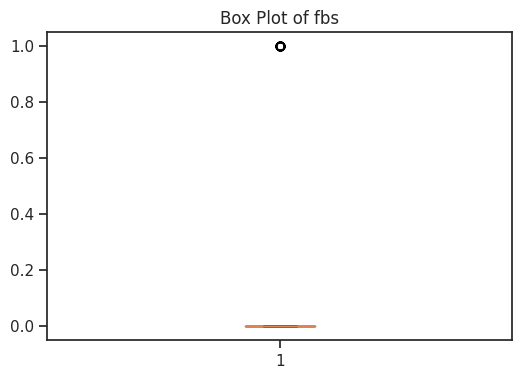

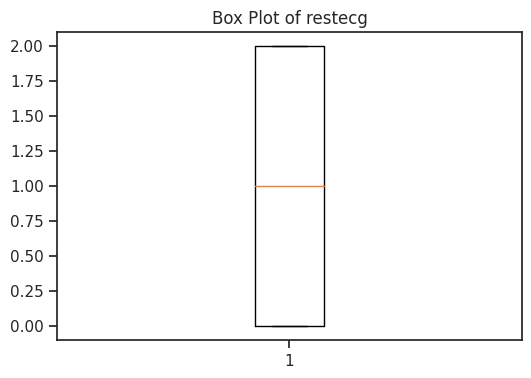

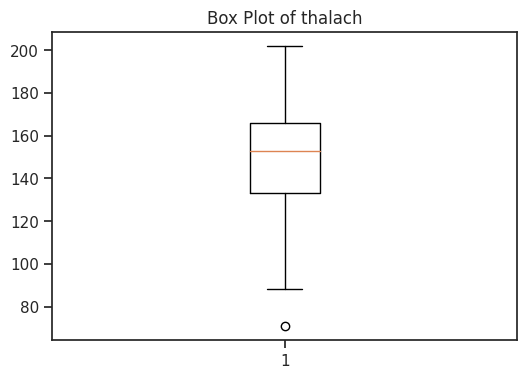

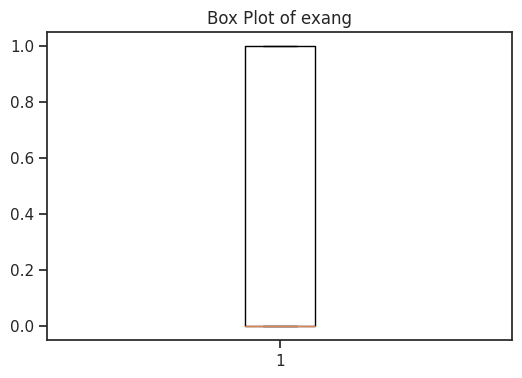

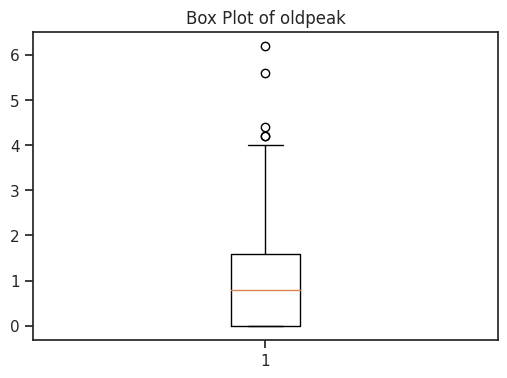

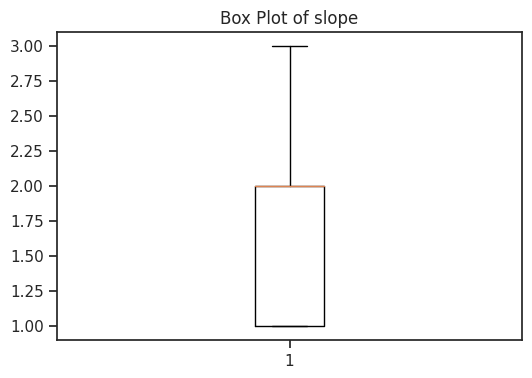

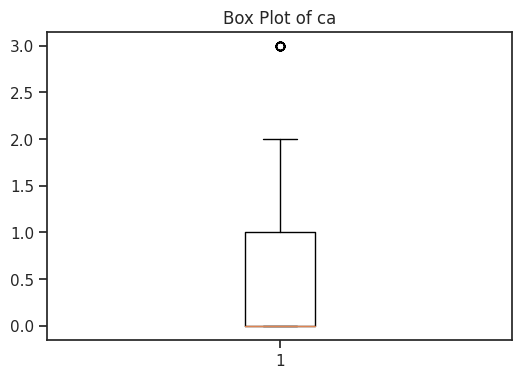

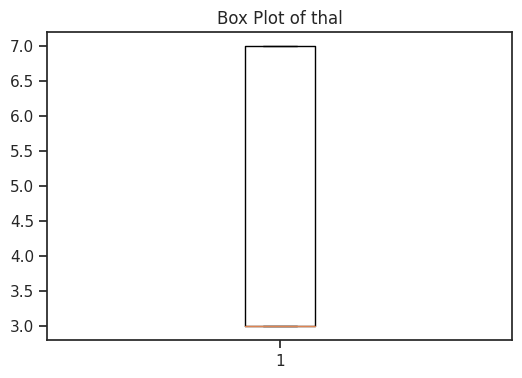

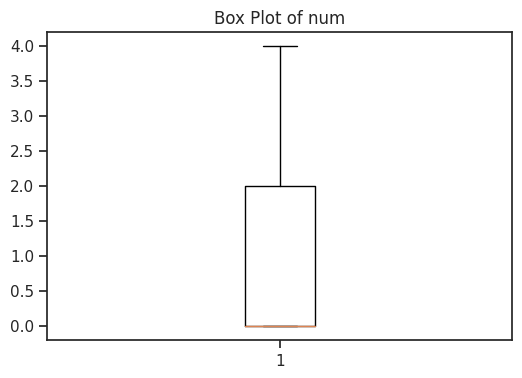

In [24]:
# Can see few outliers here talk about that

for column in df.columns:
    plt.figure(figsize=(6, 4))  
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

<Figure size 600x400 with 0 Axes>

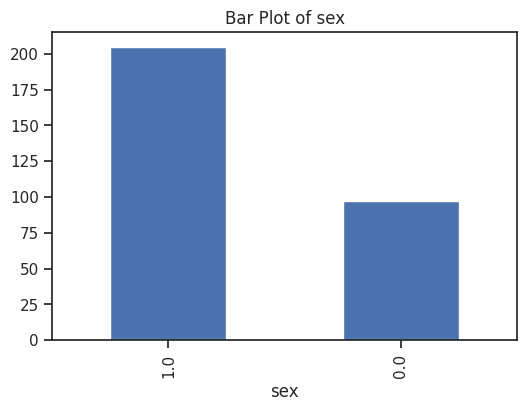

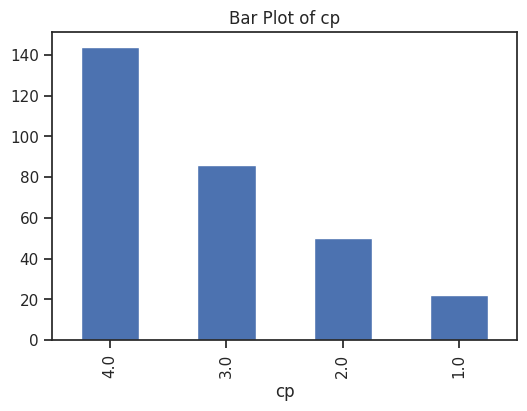

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

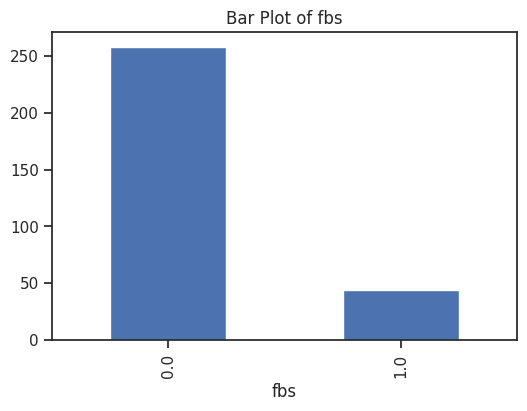

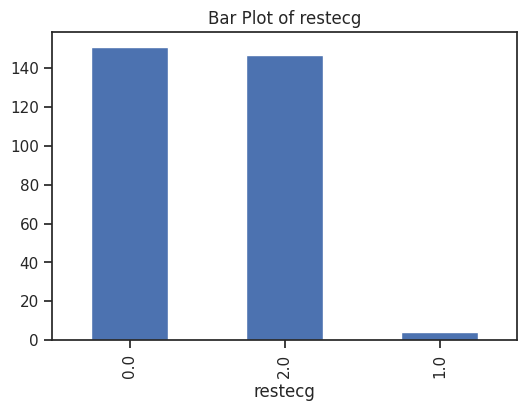

<Figure size 600x400 with 0 Axes>

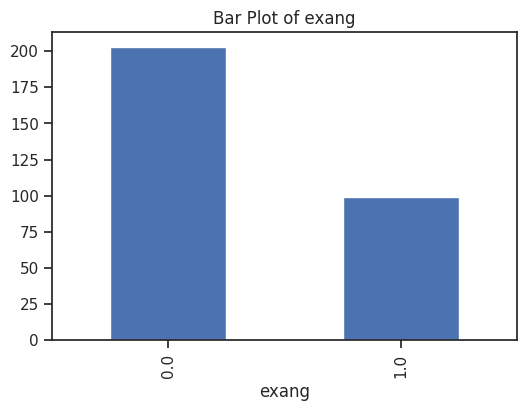

<Figure size 600x400 with 0 Axes>

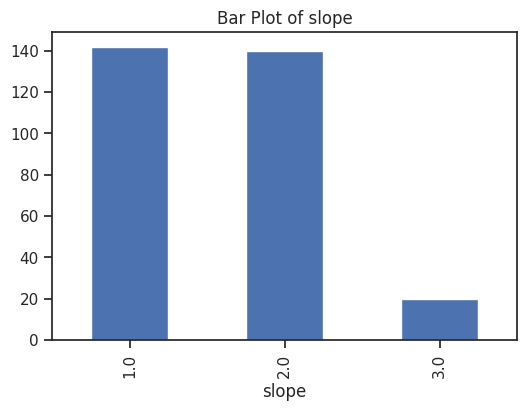

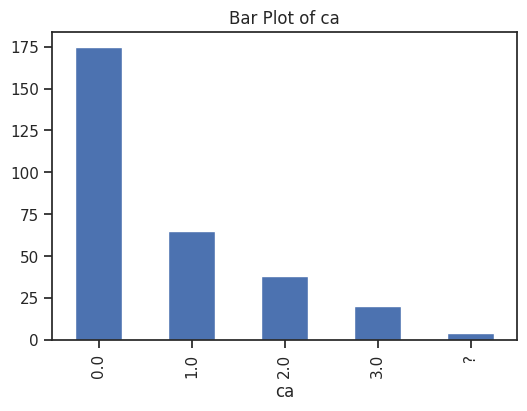

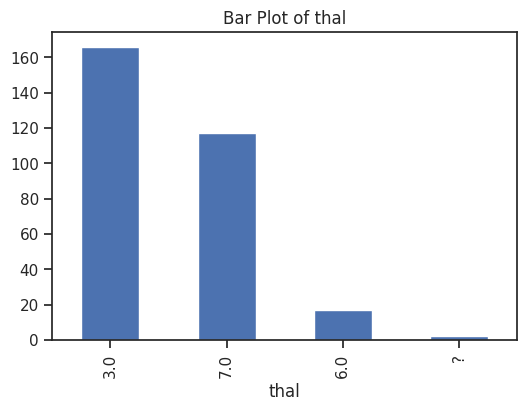

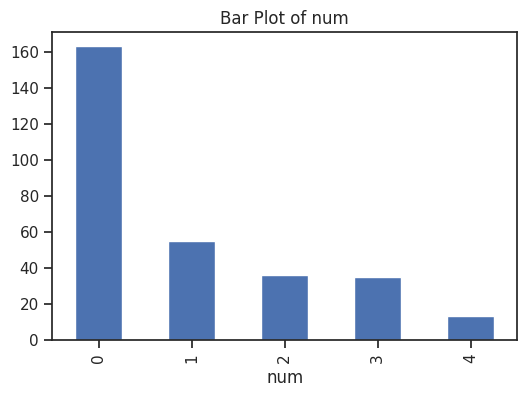

In [40]:

for col in categorical_features:
    plt.figure(figsize=(6,4))
    if(categorical_features[col] <= 10):
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Bar Plot of {col}')
        plt.show()        


# for column in df["cp","sex"]:
#     plt.figure(figsize=(6, 4))  # Set the size of each individual plot
#     df[column].value_counts().plot(kind='bar', color='skyblue')
#     plt.title(f'Bar Plot of {column}')
#     plt.show()

In [6]:
data = df.to_numpy()

In [7]:
data.shape

(302, 14)